In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

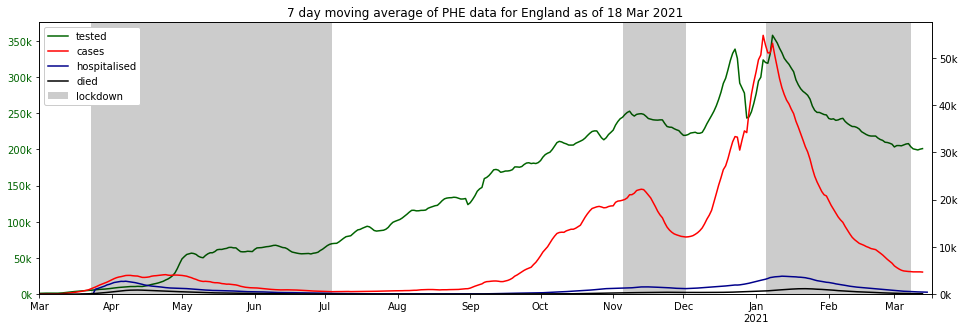

In [2]:
plot_summary(left_series=(s.unique_people_tested_sum,),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

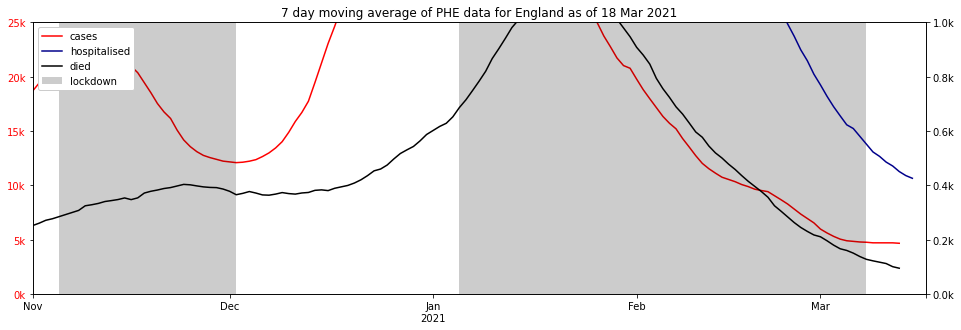

In [3]:
plot_summary(earliest_date='2020-11-01',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=25_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter, right_ymax=1_000)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,1315341.0,21886125.0,20570784.0,56286961,2.336848,36.546269,61.116883
1,Northern Ireland,N92000002,67202.0,646190.0,578988.0,1893667,3.548776,30.574964,65.876260
2,Scotland,S92000003,192100.0,2023002.0,1830902.0,5463300,3.516190,33.512749,62.971061
3,Wales,W92000004,304411.0,1180155.0,875744.0,3152879,9.655017,27.776010,62.568973


'partial: 25,735,472 (38.5%), full: 1,879,054'

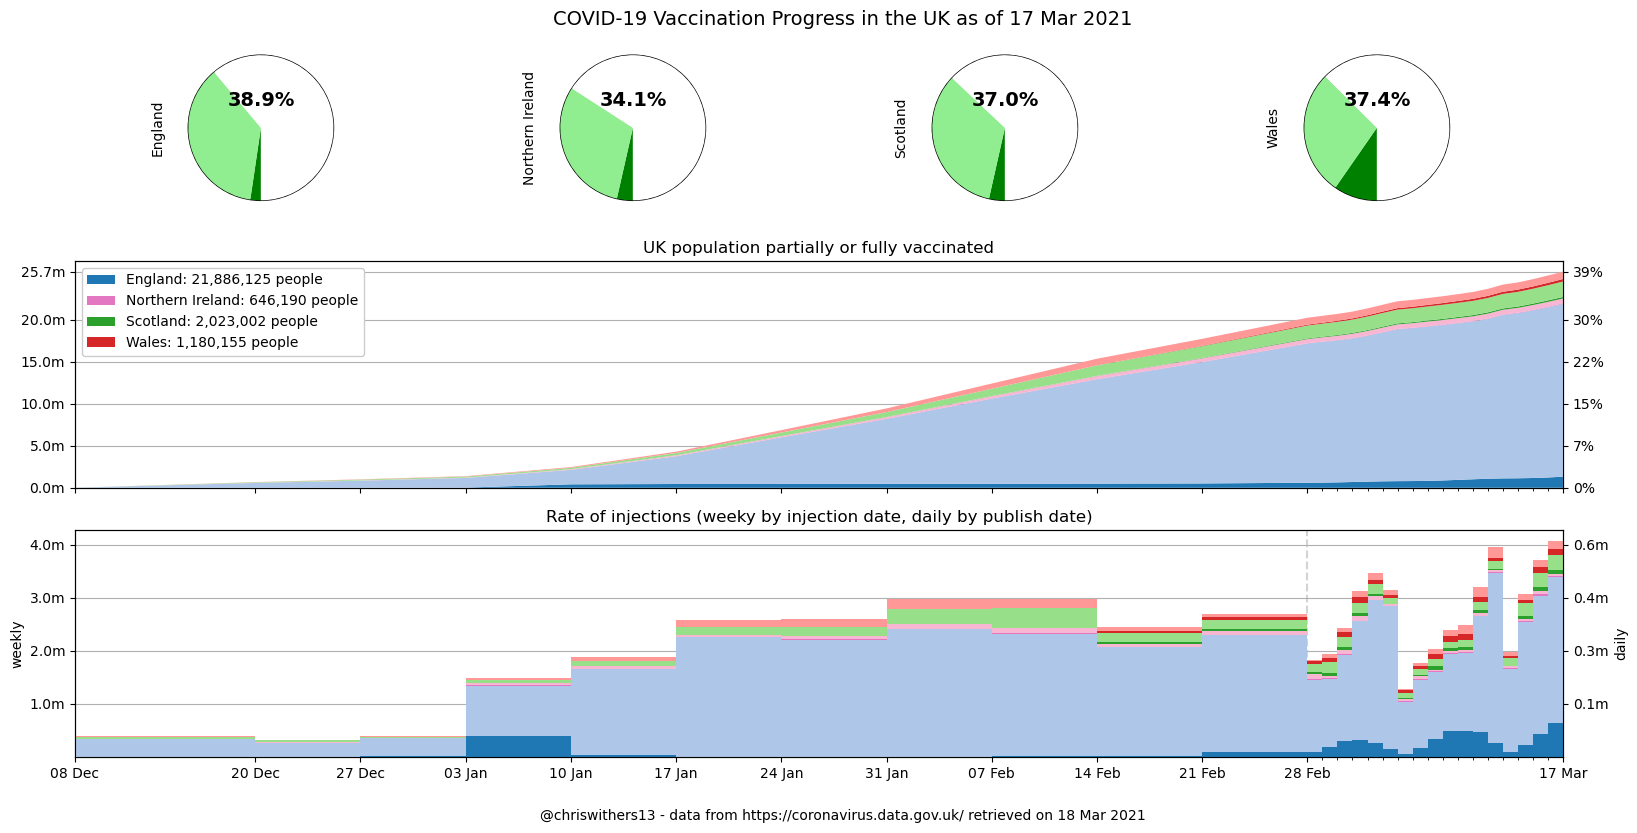

In [4]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

In [5]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,17 Mar 21,"+392,769","+90,906","+90,906","+21,886,125","+1,315,341","+1,315,341"
Northern Ireland,17 Mar 21,"+5,389","+3,256","+3,256","+646,190","+67,202","+67,202"
Scotland,17 Mar 21,"+41,184","+10,221","+10,221","+2,023,002","+192,100","+192,100"
Wales,17 Mar 21,"+22,904","+15,226","+15,226","+1,180,155","+304,411","+304,411"


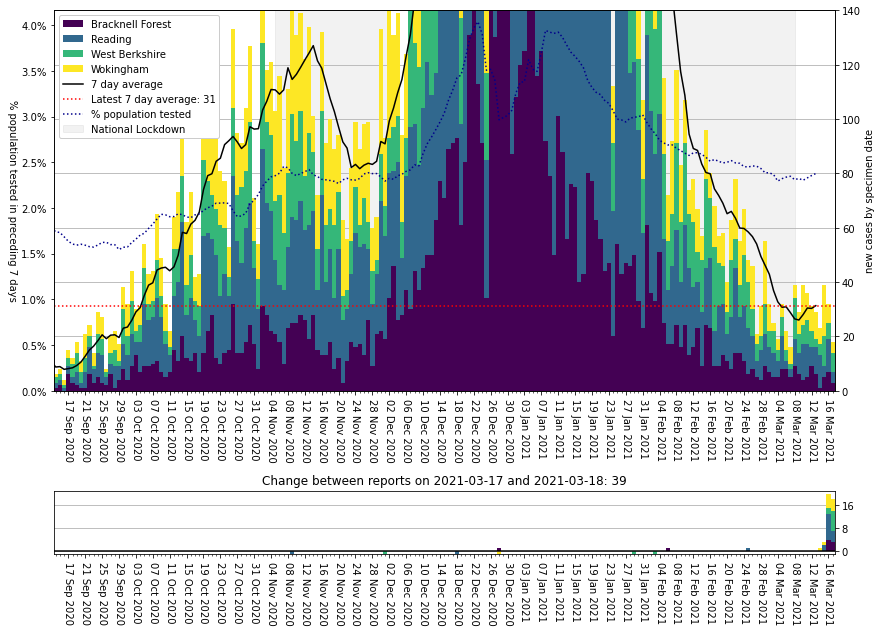

In [6]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=140)

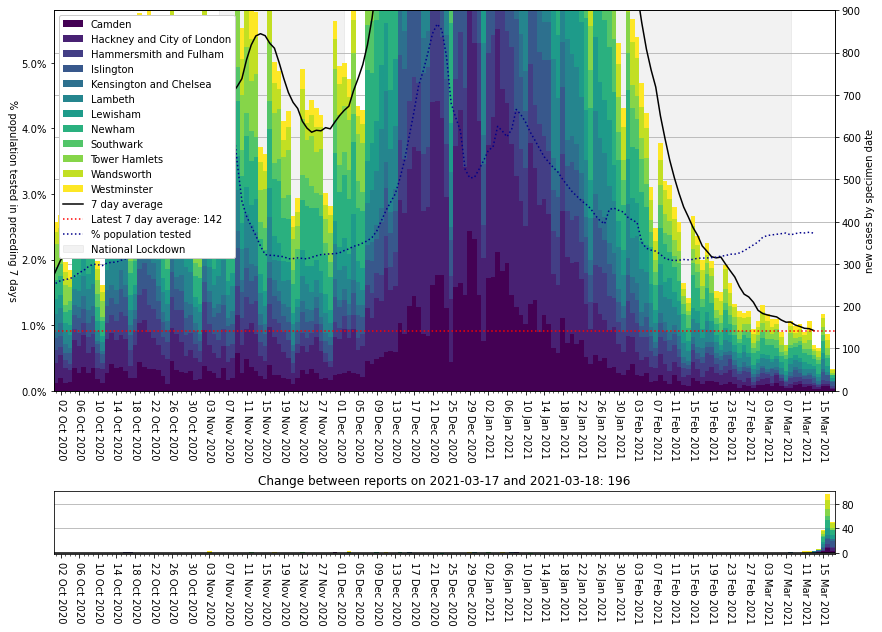

In [7]:
plot_areas(for_date, areas=london_areas, ylim=900)

In [8]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [9]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000016,Barnsley,176.208955,435.0,2021-03-17
E07000150,Corby,170.317649,123.0,2021-03-17
E07000236,Redditch,157.164471,134.0,2021-03-17
E06000010,"Kingston upon Hull, City of",147.433578,383.0,2021-03-17
S12000040,West Lothian,141.998908,260.0,2021-03-17
E06000013,North Lincolnshire,132.333480,228.0,2021-03-17
S12000011,East Renfrewshire,127.708573,122.0,2021-03-17
E08000018,Rotherham,126.596109,336.0,2021-03-17
E06000005,Darlington,119.846821,128.0,2021-03-17


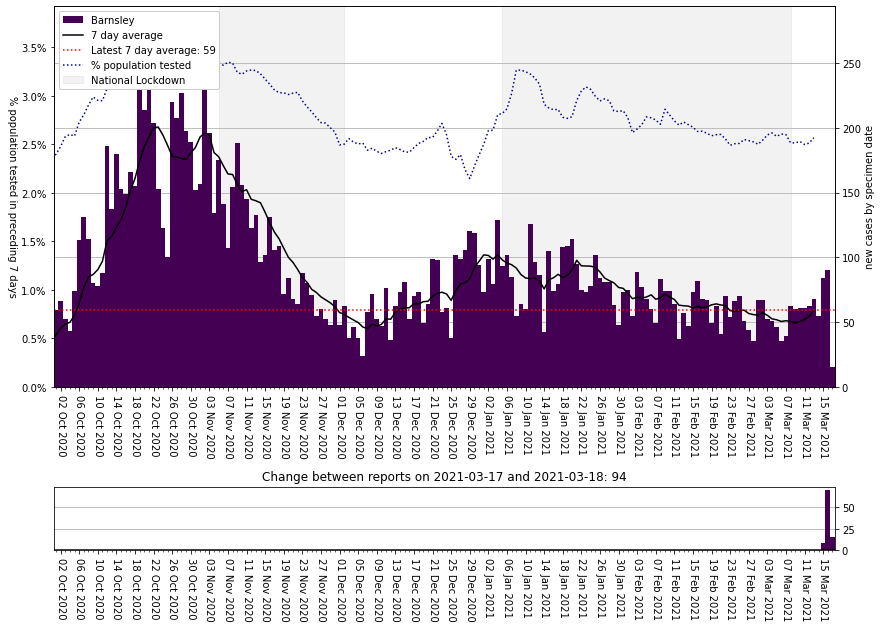

In [10]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [11]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,63.320185,723.0,2021-03-17
S12000049,Glasgow City,113.090725,716.0,2021-03-17
E08000035,Leeds,88.382995,701.0,2021-03-17
E08000032,Bradford,115.788772,625.0,2021-03-17
E08000019,Sheffield,98.657269,577.0,2021-03-17
E08000016,Barnsley,176.208955,435.0,2021-03-17
E08000003,Manchester,77.235022,427.0,2021-03-17
E08000034,Kirklees,91.635269,403.0,2021-03-17
E06000010,"Kingston upon Hull, City of",147.433578,383.0,2021-03-17


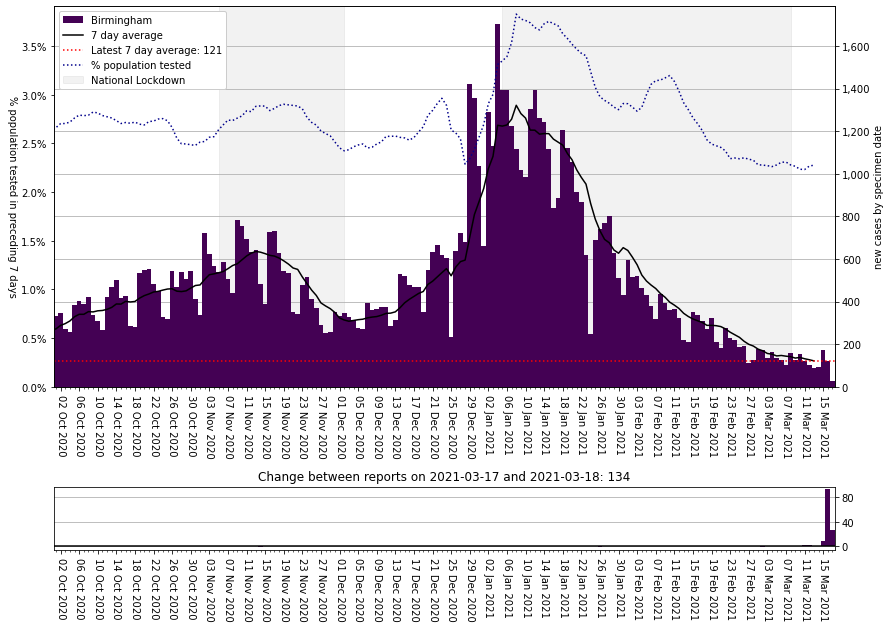

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.5
phe_max = 0.2

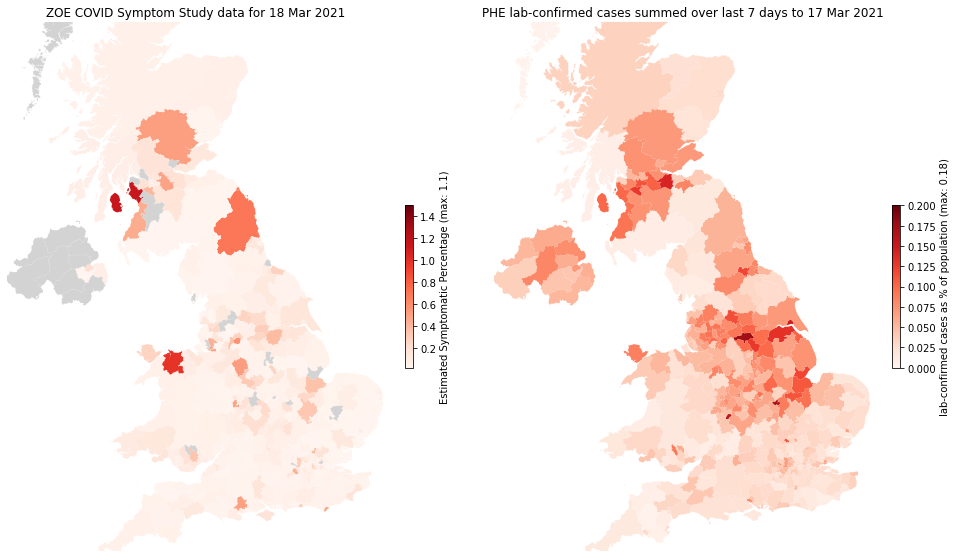

In [14]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [15]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

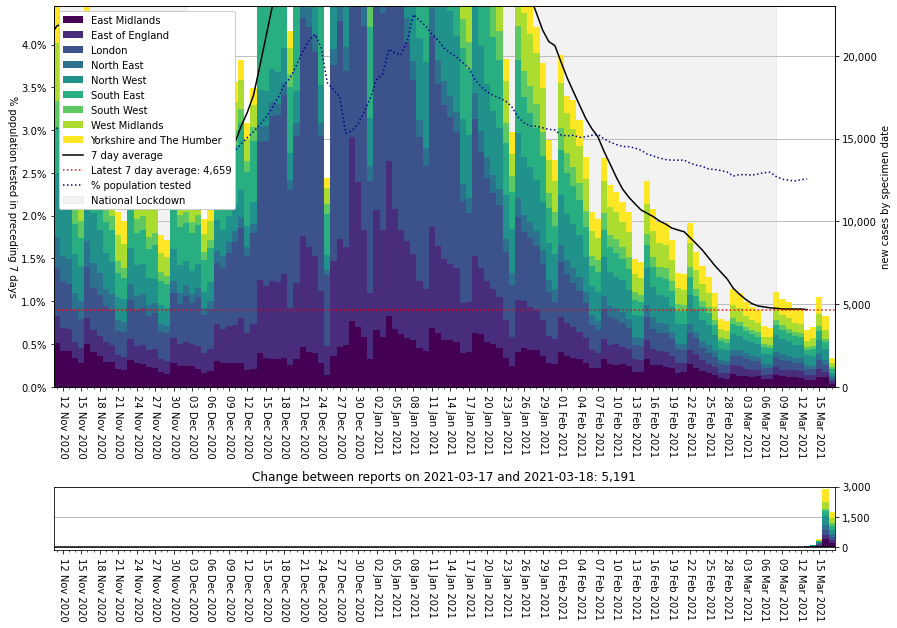

In [16]:
plot_areas(for_date, area_type=region, ylim=23_000, earliest='2020-11-11')

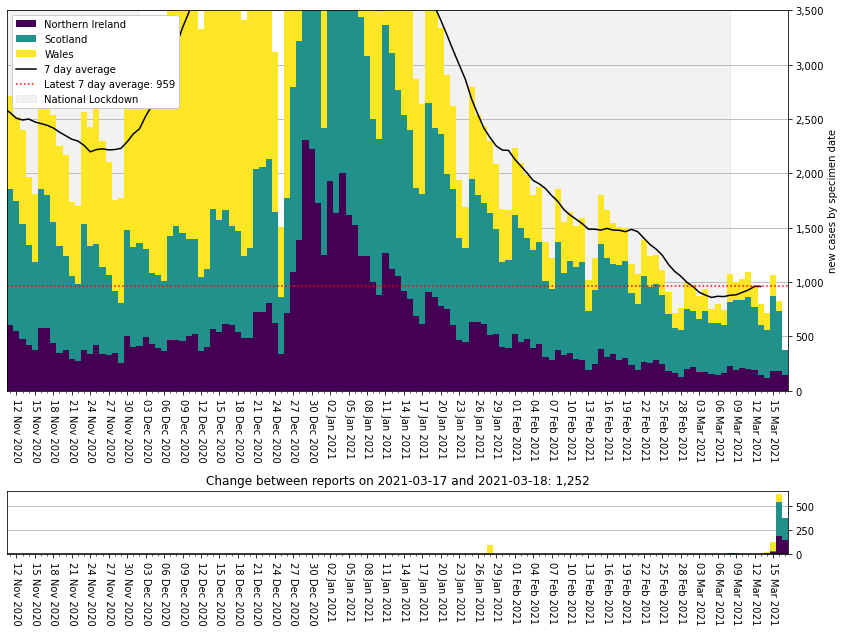

In [17]:
plot_areas(for_date, 'cases_devolved', ylim=3_500, diff_ylims=None, earliest='2020-11-11')